## Customer Segmentation Analysis Part 1

## Import Libraries and Data

In [2]:
# Import the appropriate Libraries
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np
import chardet

In [3]:
# Load the dataset
data = pd.read_csv('Sales_data.csv', encoding= 'ISO-8859-1')
# encoding='latin-1'

## Data Exploration

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
data.shape

(541909, 8)

In [6]:
data.Description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: Description, Length: 4223, dtype: int64

## Data Preprocessing
- Remove Null Values
- Remove Duplicate Values

In [7]:
# Take all the rows where customer ID not equal to blank
data= data[pd.notnull(data['CustomerID'])]

In [8]:
data.shape

(406829, 8)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [10]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [11]:
# Removing duplicates
filtered_data=data[['Country','CustomerID']].drop_duplicates()

In [12]:
filtered_data.shape

(4380, 2)

In [13]:
filtered_data.head()

,Country,CustomerID
0,United Kingdom,17850.0
9,United Kingdom,13047.0
26,France,12583.0
46,United Kingdom,13748.0
65,United Kingdom,15100.0


In [14]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4380 entries, 0 to 541768
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     4380 non-null   object 
 1   CustomerID  4380 non-null   float64
dtypes: float64(1), object(1)
memory usage: 102.7+ KB


## Data Insights 
 - Top 10 country customer data 

In [15]:
# Check the country wise distribution
data.Country.value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [16]:
filtered_data.Country.value_counts()[:10]


United Kingdom    3950
Germany             95
France              87
Spain               31
Belgium             25
Switzerland         21
Portugal            19
Italy               15
Finland             12
Austria             11
Name: Country, dtype: int64

<AxesSubplot:>

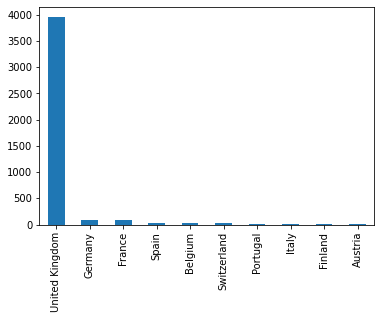

In [17]:
# Plot the data
filtered_data.Country.value_counts()[:10].plot(kind='bar')

- Here we observe that in the given data, UK is the country with the highest number of cells/info

In [18]:
## Filter data by the top most country
uk_data=data[data.Country=='United Kingdom']

In [19]:
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


- We have the follwing observations:
    1. "count" filed has same information for all 3 columns and is not really useful individually
    2. For "min" field:
            - negative value for "quantity" which may or may not be correct (Could be returned items showing as negative)
            - "UnitPrice" is 0 which may or may not be correct (there could have been a discount and hence 0 price)

In [20]:
uk_data = uk_data[(uk_data['Quantity'] > 0)]

In [21]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    354345 non-null  object 
 1   StockCode    354345 non-null  object 
 2   Description  354345 non-null  object 
 3   Quantity     354345 non-null  int64  
 4   InvoiceDate  354345 non-null  object 
 5   UnitPrice    354345 non-null  float64
 6   CustomerID   354345 non-null  float64
 7   Country      354345 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.3+ MB


In [22]:
uk_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [23]:
# Filter the required columns only
uk_data=uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

In [24]:
# Calculate Total Price
uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['UnitPrice']

##  Time frame of data

In [25]:
# Check Min and Max dates
print(uk_data['InvoiceDate'].min())
print(uk_data['InvoiceDate'].max())

1/10/2011 10:32
9/9/2011 9:52


**********  - As per the information above, these are the dates when minimum and maximum orders were purchased

## Performing RFM Analysis

- For Recency, Calculate the number of days between present date and date of last purchase for each customer.
- For Frequency, Calculate the number of orders for each customer.
- For Monetary, Calculate sum of purchase price for each customer

In [26]:
# Store a date as a reference point for recency calculations
PRESENT = dt.datetime(2011, 12, 10)

# Convert date to datetime format
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])

In [27]:
# Check Min and Max dates
print(uk_data['InvoiceDate'].min())
print(uk_data['InvoiceDate'].max())

2010-12-01 08:26:00
2011-12-09 12:49:00


In [28]:
uk_data['InvoiceDate'].head()

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [29]:
uk_data['InvoiceNo'].value_counts().head()

576339    542
579196    533
580727    529
578270    442
573576    435
Name: InvoiceNo, dtype: int64

- The above information shows the unique invoice numbers along with their total count

In [30]:
orders = uk_data.groupby(['InvoiceNo', 'InvoiceDate', 'CustomerID']).agg({'TotalPrice': lambda x: x.sum()}).reset_index()
orders.head()

,InvoiceNo,InvoiceDate,CustomerID,TotalPrice
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [31]:
rfm= uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'TotalPrice': lambda price: price.sum()})

In [32]:
rfm

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


In [33]:
# Rename the columns 
rfm.columns=['monetary','frequency','recency']

In [34]:
rfm['recency'] = rfm['recency'].astype(int)

In [35]:
rfm['monetary'] = rfm['monetary'].astype(int)

In [36]:
rfm.head()

,monetary,frequency,recency
CustomerID,,,
12346.0,325,1,77183
12747.0,2,103,4196
12748.0,0,4596,33719
12749.0,3,199,4090
12820.0,3,59,942


- In the table above the column name seems to be incorrect for recency and monetary. The value of recency cannot be 77183 as it doesnt explains the purpose of this column


In [37]:
# Change the column names
rfm.columns=['recency','frequency','monetary']
rfm

,recency,frequency,monetary
CustomerID,,,
12346.0,325,1,77183
12747.0,2,103,4196
12748.0,0,4596,33719
12749.0,3,199,4090
12820.0,3,59,942
...,...,...,...
18280.0,277,10,180
18281.0,180,7,80
18282.0,7,12,178


##  Creating Visuals
- Histogram for Recency Data
- Histogram for Frequency Data
- Histogram for Monetary Data


array([[<AxesSubplot:title={'center':'recency'}>]], dtype=object)

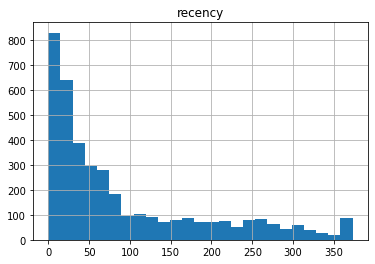

In [38]:
# Histogram for Recency Data (UK)
rfm.hist(column='recency', bins=25)

- The above chart shows that most of the orders have been made recently between 0-100 days.
- It also shows that the majority of the orders within this range were between 0 to 50 days.

array([[<AxesSubplot:title={'center':'frequency'}>]], dtype=object)

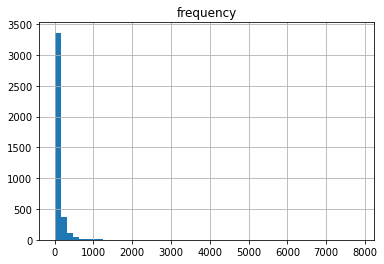

In [39]:
# Histogram for Frequency Data (UK)

rfm.hist(column='frequency', bins=50)

- The above plot tells that the orders are majorly not frequent

array([[<AxesSubplot:title={'center':'monetary'}>]], dtype=object)

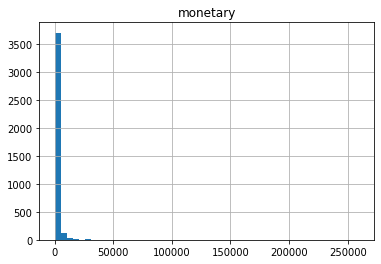

In [40]:
# Histogram for Monetary Data (UK)
rfm.hist(column='monetary', bins=50)

rfm.sort_values(by=['monetary'], inplace=True)

rfm = rfm[rfm.monetary <10000]

rfm.tail(100)

# Histogram for Monetary Data (UK)


array([[<AxesSubplot:title={'center':'monetary'}>]], dtype=object)

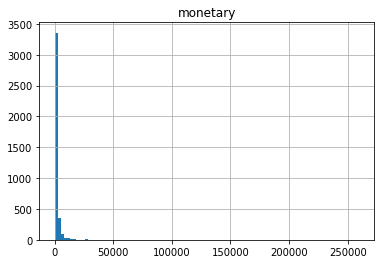

In [41]:
rfm.hist(column='monetary', bins=100)

- The plot above shows that most of the orders had a monetary value of less then 25,000

In [42]:
# Calculate Z scores to normalize the data
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(rfm))
print(z)

             recency  frequency   monetary
CustomerID                                
12346.0     2.344127   0.410395  10.068168
12747.0     0.901588   0.057992   0.311802
12748.0     0.921685  20.690005   4.258219
12749.0     0.891539   0.498828   0.297632
12820.0     0.891539   0.144057   0.123169
...              ...        ...        ...
18280.0     1.861791   0.369067   0.225028
18281.0     0.887072   0.382843   0.238395
18282.0     0.851345   0.359883   0.225295
18283.0     0.891539   3.056591   0.030822
18287.0     0.499642   0.093545   0.003532

[3921 rows x 3 columns]


In [43]:
# Save the cleaned file
rfm.to_csv('rfm.csv')


In [44]:
# made a copy of rfm file for new quintile calculation in the end

rfm2=pd.read_csv('rfm.csv')
rfm2.head()

,CustomerID,recency,frequency,monetary
0,12346.0,325,1,77183
1,12747.0,2,103,4196
2,12748.0,0,4596,33719
3,12749.0,3,199,4090
4,12820.0,3,59,942


## Calculating the RFM Score 

In [45]:
# Use quintiles to to make 5 equal parts based on the available values. Each quintiles contains 20% of the population. 
quintiles = rfm[['recency', 'frequency', 'monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'recency': {0.2: 12.0, 0.4: 32.0, 0.6: 71.0, 0.8: 178.0},
 'frequency': {0.2: 13.0, 0.4: 29.0, 0.6: 58.0, 0.8: 120.0},
 'monetary': {0.2: 241.0, 0.4: 465.0, 0.6: 897.0, 0.8: 1957.0}}

In [46]:
# Define functions to assign ranks from 1 to 5. 
# A lower Recency value is better and higher Frequency and Monetary values are better. 
# We will have to write two separate functions

In [47]:
def r_score(x):
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1
    
def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5  

In [48]:
# Calculate RFM score for each customer

rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm['M'] = rfm['monetary'].apply(lambda x: fm_score(x, 'monetary'))

In [49]:
# Combine the scores
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,recency,frequency,monetary,R,F,M,RFM Score
CustomerID,,,,,,,
12346.0,325,1,77183,1,1,5,115
12747.0,2,103,4196,5,4,5,545
12748.0,0,4596,33719,5,5,5,555
12749.0,3,199,4090,5,5,5,555
12820.0,3,59,942,5,4,4,544


In [50]:
# Create the customer segments based on your knowledge. 
# Create 6 segments based on R and F scores

segments = {
    '[1-2][1-4]': 'at risk',
    '[1-2]5': 'can\'t loose',
    '3[1-3]': 'needs attention',
    '[3-4][4-5]': 'loyal customers',
    '[4-5]1': 'new customers',
    '[4-5][2-5]': 'champions'
    
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segments, regex=True)
rfm.head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
12346.0,325,1,77183,1,1,5,115,at risk
12747.0,2,103,4196,5,4,5,545,champions
12748.0,0,4596,33719,5,5,5,555,champions
12749.0,3,199,4090,5,5,5,555,champions
12820.0,3,59,942,5,4,4,544,champions


In [51]:
# count the number of customers in each segment
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

segments_counts

can't loose          74
new customers       146
needs attention     486
loyal customers     722
champions          1012
at risk            1481
Name: Segment, dtype: int64

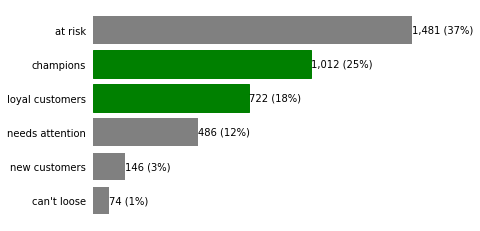

In [52]:
# Distribution of Segments
fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='gray')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('green')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

- As per the plot above, about 43% customers are those whom we can classify as completel non risky (25%+18%) whereas, 37% of customers are at high risk and are potential customers who may churn whereas only 3% are new customers.

In [53]:
rfm[rfm['RFM Score']=='555'].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
18102.0,0,431,259657,5,5,5,555,champions
17450.0,8,337,194550,5,5,5,555,champions
17511.0,2,963,91062,5,5,5,555,champions
16684.0,4,277,66653,5,5,5,555,champions
14096.0,4,5111,65164,5,5,5,555,champions


- Solution is below

In [54]:
rfm[rfm['Segment']=='needs attention']

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
12822.0,70,46,948,3,3,4,334,needs attention
12824.0,59,25,397,3,2,2,322,needs attention
12830.0,37,38,6814,3,3,5,335,needs attention
12842.0,70,34,1118,3,3,4,334,needs attention
12863.0,52,5,521,3,1,3,313,needs attention
...,...,...,...,...,...,...,...,...
18240.0,46,6,422,3,1,2,312,needs attention
18261.0,43,21,324,3,2,2,322,needs attention
18270.0,38,11,283,3,1,2,312,needs attention


In [55]:
#Customers who's recency value is low

rfm[rfm['R'] <= 1 ].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
12346.0,325,1,77183,1,1,5,115,at risk
15749.0,235,10,44534,1,1,5,115,at risk
15098.0,182,3,39916,1,1,5,115,at risk
13093.0,275,159,7832,1,5,5,155,can't loose
17850.0,372,297,5391,1,5,5,155,can't loose


- Customers that we are going to loose

In [56]:
rfm[rfm['Segment']=='at risk']

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
12346.0,325,1,77183,1,1,5,115,at risk
12821.0,214,6,92,1,1,1,111,at risk
12823.0,74,5,1759,2,1,4,214,at risk
12829.0,336,11,293,1,1,2,112,at risk
12831.0,262,9,215,1,1,1,111,at risk
...,...,...,...,...,...,...,...,...
18268.0,134,1,25,2,1,1,211,at risk
18269.0,366,7,168,1,1,1,111,at risk
18278.0,73,9,173,2,1,1,211,at risk


In [57]:
#Customers who's recency, frequency and monetary values are low 

rfm[rfm['RFM Score']=='111'].sort_values('recency',ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
13747.0,373,1,79,1,1,1,111,at risk
14237.0,373,9,161,1,1,1,111,at risk
17643.0,373,8,101,1,1,1,111,at risk
15350.0,373,5,115,1,1,1,111,at risk
13011.0,372,3,50,1,1,1,111,at risk


In [58]:
#Customers with high frequency value

rfm[rfm['F'] >= 3 ].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
18102.0,0,431,259657,5,5,5,555,champions
17450.0,8,337,194550,5,5,5,555,champions
17511.0,2,963,91062,5,5,5,555,champions
16029.0,38,242,81024,3,5,5,355,loyal customers
16684.0,4,277,66653,5,5,5,555,champions


## Calculate RFM scores using 4 quintiles instead of 5 and answer all the questions again
- Make sure you give proper names to the segments. Please create 4 segments based on R and F scores instead of 6


In [59]:
# Using 4 quintiles instead of of 5
quintiles_new = rfm2[['recency', 'frequency', 'monetary']].quantile([.25, .50, .75]).to_dict()
quintiles_new

{'recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'monetary': {0.25: 300.0, 0.5: 651.0, 0.75: 1575.0}}

In [60]:
def r_score1(x):
    if x <= quintiles_new['recency'][.25]:
        return 4
    elif x <= quintiles_new['recency'][.50]:
        return 3
    elif x <= quintiles_new['recency'][.75]:
        return 2
    else:
        return 1
    
def fm_score1(x, c):
    if x <= quintiles_new[c][.25]:
        return 1
    elif x <= quintiles_new[c][.50]:
        return 2
    elif x <= quintiles_new[c][.75]:
        return 3
    else:
        return 4  

In [61]:
rfm2['R2'] = rfm2['recency'].apply(lambda x: r_score1(x))
rfm2['F2'] = rfm2['frequency'].apply(lambda x: fm_score1(x, 'frequency'))
rfm2['M2'] = rfm2['monetary'].apply(lambda x: fm_score1(x, 'monetary'))

In [62]:
rfm2['RFM Score'] = rfm2['R2'].map(str) + rfm2['F2'].map(str) + rfm2['M2'].map(str)
rfm2.head()

,CustomerID,recency,frequency,monetary,R2,F2,M2,RFM Score
0,12346.0,325,1,77183,1,1,4,114
1,12747.0,2,103,4196,4,4,4,444
2,12748.0,0,4596,33719,4,4,4,444
3,12749.0,3,199,4090,4,4,4,444
4,12820.0,3,59,942,4,3,3,433


In [63]:
print("champions: ",len(rfm2[rfm2['RFM Score']=='444']))
print('loyal customers: ',len(rfm2[rfm2['F2']==4]))
print("Big Spenders: ",len(rfm2[rfm2['M2']==4]))
print('at risk: ', len(rfm2[rfm2['RFM Score']=='244']))
print('Lost Customers: ',len(rfm2[rfm2['RFM Score']=='144']))
print('Lost Cheap Customers: ',len(rfm2[rfm2['RFM Score']=='111']))

champions:  409
loyal customers:  980
Big Spenders:  980
at risk:  92
Lost Customers:  20
Lost Cheap Customers:  345
